In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')       #Read Csv file

In [3]:
df.shape                       # Returns the size of array

(42000, 785)

In [4]:
df.head()                   # see the content 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)

(42000, 785)


In [6]:
x=data[:,1:]                   #slicing- x contains all the data except label column
y=data[:,0]                    #slicing- y contains label column
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [7]:
def drawing(img,label,i):
    plt.subplot(2,5,i)                  #returns the image in a grid format 
    plt.title("Label"+str(label))       
    plt.imshow(img.reshape((28,28)),cmap='gray')      #To show the image

In [8]:
print(y[:10])                                   #print labels

[1 0 1 4 0 0 7 3 5 3]


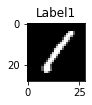

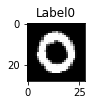

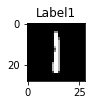

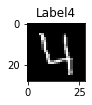

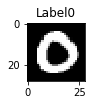

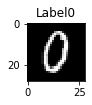

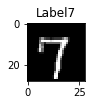

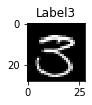

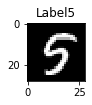

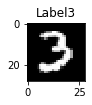

In [9]:
for i in range(10):
    drawing(x[i],y[i],i+1)
    plt.show()

In [10]:
def distance(p1,p2):
    return np.sum((p2-p1)**2)**.5


def knn(x,y,test,k=10):             # Quadratic complexity not good for large datasets
    m=x.shape[0]
    d=[]
    for i in range(m):
        dist =distance(test,x[i])
        d.append((dist,y[i]))
    sorted(d)
    d=np.array(sorted(d))[:,1]
    d=d[:k]
    t = np.unique(d,return_counts=True)            #Returns all the unique no. with there counts
    idx=np.argmax(t[1])                            #Returns the max. no.
    pred = int(t[0][idx])
    return pred

In [11]:
test = pd.read_csv('test.csv')                    # Read the Test Data-set

In [12]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test =test.values
print(test.shape)

(28000, 784)


In [14]:
knn(x,y,test[3])              #Called Knn function

4